# Un esempio di analisi della logica della _backpropagation_
Luca Mari, aprile 2023

In [55]:
from micrograd.engine import Value
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

I valori delle variabili di input, $x_1$ e $x_2$, e il modello da calcolare, $y = z_1^2 + x_2^3 = (4 x_1)^2 + x_2^3$.

In [56]:
x1 = Value(1.0)
x2 = Value(2.0)
z1 = 4 * x1
y = z1**2 + x2**3

Semplicemente, il risultato dell'esecuzione (forward pass) ($4^2 \times 2^3$).

In [57]:
print(f"Risultato dell'esecuzione (forward pass): {y.data:.2f}")

Risultato dell'esecuzione (forward pass): 24.00


La backpropagation nel modello $y = z_1^2 + x_2^3 = (4 x_1)^2 + x_2^3$:
* ${\partial y \over \partial x_2} = 3 x_2^2$
* ${\partial y \over \partial z_1} = 2 z_1$
* ${\partial y \over \partial x_1} = {\partial y \over \partial z_1} \times {\partial z_1 \over \partial x_1}$ (_chain rule_) e quindi $(2 \times z_1) \times 4$

In [58]:
y.backward()
print(f"Valore numerico di dy/dx2: {x2.grad:.2f}")
print(f"Valore numerico di dy/dz1: {z1.grad:.2f}")
print(f"Valore numerico di dy/dx1: {x1.grad:.2f}")

Valore numerico di dy/dx2: 12.00
Valore numerico di dy/dz1: 8.00
Valore numerico di dy/dx1: 32.00


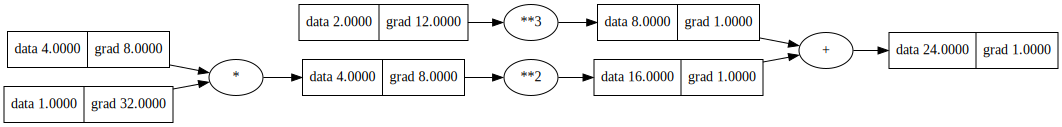

In [59]:
#nodes, edges = trace(y)
#print(nodes)
#print(edges)
draw_dot(y)